In [98]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

#importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#libraries for data split and model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,f1_score

#ROC -AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [65]:
df = pd.read_csv('Predict_Loan_Approval_new.csv',index_col = 0)

In [66]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,total_income,Loan_Amount_Term_Years
0,Male,Yes,1,Graduate,No,128,1,Rural,N,6091.0,30.0
1,Male,Yes,0,Graduate,Yes,66,1,Urban,Y,3000.0,30.0
2,Male,Yes,0,Not Graduate,No,120,1,Urban,Y,4941.0,30.0
3,Male,No,0,Graduate,No,141,1,Urban,Y,6000.0,30.0
4,Male,Yes,2,Graduate,Yes,267,1,Urban,Y,9613.0,30.0


In [67]:
df = df[df['total_income'] < 25000]

In [68]:
# splitting the dataframe
X = df.loc[:,df.columns != 'Loan_Status'] 
y = df.loc[:,df.columns == 'Loan_Status']

In [69]:
X.shape

(474, 10)

In [70]:
#creating dummies of the data set
X = pd.get_dummies(X,drop_first=True)
X.head()

,Dependents,LoanAmount,Credit_History,total_income,Loan_Amount_Term_Years,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,128,1,6091.0,30.0,1,1,0,0,0,0
1,0,66,1,3000.0,30.0,1,1,0,1,0,1
2,0,120,1,4941.0,30.0,1,1,1,0,0,1
3,0,141,1,6000.0,30.0,1,0,0,0,0,1
4,2,267,1,9613.0,30.0,1,1,0,1,0,1


In [71]:
#creating dummies of the data set
y = pd.get_dummies(y,drop_first=True)
y.head()

,Loan_Status_Y
0,0
1,1
2,1
3,1
4,1


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1000)

In [73]:
#creating the instance of Logistic regression
log_reg_model = LogisticRegression(max_iter = 6000)

In [74]:
log_reg_model = log_reg_model.fit(X_train.values,y_train.values.ravel()) #fitting the model over the training data

In [75]:
y_pred = log_reg_model.predict(X_test)

### Model evaluation

In [76]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score

In [77]:
accuracy_score(y_test,y_pred)

0.8315789473684211

In [78]:
print(confusion_matrix(y_test,y_pred))

[[20 13]
 [ 3 59]]


In [80]:
print(classification_report(y_test,y_pred),'\n')

              precision    recall  f1-score   support

           0       0.87      0.61      0.71        33
           1       0.82      0.95      0.88        62

    accuracy                           0.83        95
   macro avg       0.84      0.78      0.80        95
weighted avg       0.84      0.83      0.82        95
 



In [79]:
roc_auc_score(y_test,y_pred)

0.7788367546432062

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [18]:
tn

20

### Model 2

In [20]:
X.head()

,Dependents,LoanAmount,Credit_History,total_income,Loan_Amount_Term_Years,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,128,1,6091.0,30.0,1,1,0,0,0,0
1,0,66,1,3000.0,30.0,1,1,0,1,0,1
2,0,120,1,4941.0,30.0,1,1,1,0,0,1
3,0,141,1,6000.0,30.0,1,0,0,0,0,1
4,2,267,1,9613.0,30.0,1,1,0,1,0,1


### LogisticRegression

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sscaler = StandardScaler()

In [83]:
scaled_data = sscaler.fit_transform(X)

In [84]:
scaled_X = pd.DataFrame(scaled_data,columns = X.columns)

In [85]:
# scaled_X.head()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state= 1004)   
#creating the instance of Logistic regression
log_reg_model = LogisticRegression(max_iter = 650)
log_reg_model = log_reg_model.fit(X_train.values,y_train.values.ravel()) #fitting the model over the training data
y_pred = log_reg_model.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred)

0.8210526315789474

In [93]:
print(confusion_matrix(y_test,y_pred))

[[19 15]
 [ 2 59]]


In [94]:
roc_auc_score(y_test,y_pred)

0.7630183220829315

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.43      0.58        30
           1       0.79      0.97      0.87        65

    accuracy                           0.80        95
   macro avg       0.83      0.70      0.72        95
weighted avg       0.81      0.80      0.78        95



In [99]:
f1_score(y_test,y_pred)

0.874074074074074

### ROC AUC curve

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

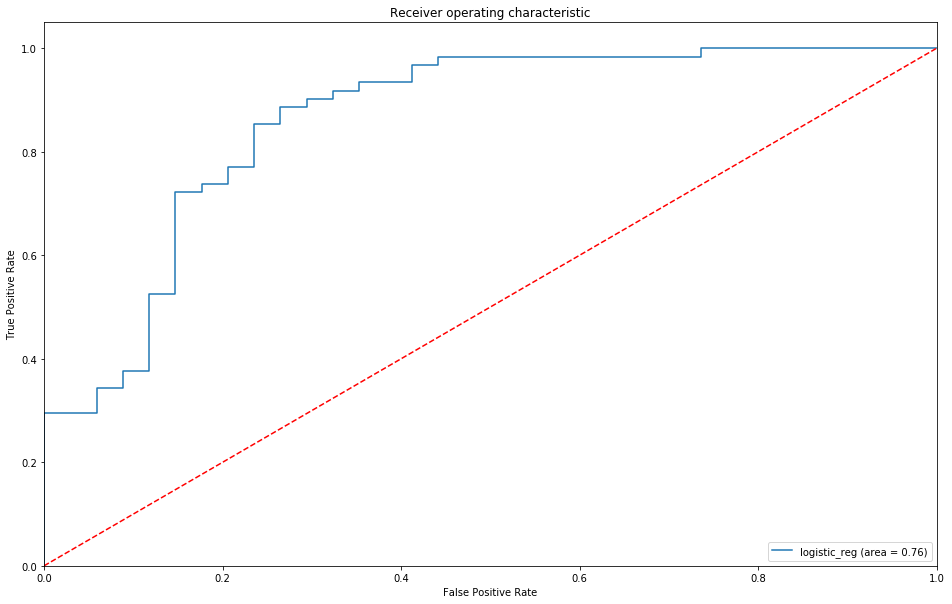

In [97]:
logistic_reg = roc_auc_score(y_test, log_reg_model.predict(X_test))
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,10))
plt.plot(fpr_log, tpr_log, label='logistic_reg (area = %0.2f)' % logistic_reg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()